In [1]:
#Load the SQL extension and establish a connection with the database

import pandas as pd
import csv, sqlite3
import seaborn as sns

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
%load_ext sql

In [2]:
#Connect to magic sql using sqlite

%sql sqlite:///socioeconomic.db

In [3]:
# Store the dataset in a table
import ssl
ssl._create_default_https_context = ssl._create_unverified_context # had to use this line to fix the certificate verify failed issue

df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

78

In [4]:
# Import prettytable library to display data in a formatted table

import prettytable
prettytable.DEFAULT = 'DEFAULT' # simple table format

In [5]:
# Verfiy that the table is created

%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


Question 1. How many rows are in the dataset

In [6]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


Question 2. How many community areas in Chicago have a hardship index greater than 50.0?

In [7]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


Question 3. What is the maximum value of hardship index in this dataset?

In [8]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


Question 4. Which community area has the highest hardship index?

In [9]:
%sql SELECT community_area_name from chicago_socioeconomic_data where hardship_index = (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data)

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


Question 5. Which Chicago community areas have per-capita incomes greater than $60,000?

In [10]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


Question 6. Create a scatterplot using the variables per_capita_income_ and hardship_index. 

 * sqlite:///socioeconomic.db
Done.


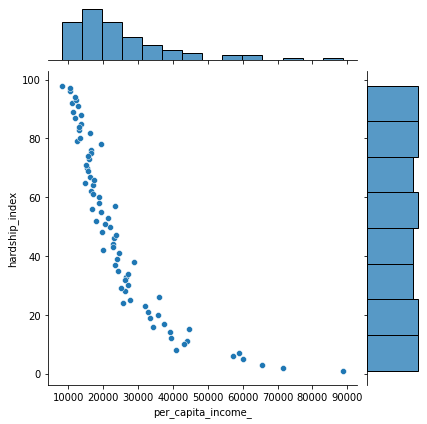

In [11]:
%matplotlib inline
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship.DataFrame())

The plot shows a negative correlation between per_capita_income_ and hardship_index.